# Capstone 2

-- Muchammad Fahd Ishamuddin

## DATA COLLECTION AND IMPORT

### Importing Library
- `Pandas` for reading datafram
- `Numpy` for array and mathematical thing
- `matplitlib` for visualize data
- `seaborn` visualize data more beauty

In [1]:
import pandas as pd #load for dataframe
import numpy as np #load for mathematical thing and numeration
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #for advance visualization

#### Open Dataset

Because We use CSV so should use `read_csv` to open file CSV

In [2]:
data = pd.read_csv('NYC_trip_record.csv')
data.head()

/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_25560/877952477.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('NYC_trip_record.csv')


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


DATA INFORMATION : 

- `VendorID` it means provider id (1 : Creative Mobile, 2 : Verifone Inc.)

- `Ipep_pickup_datetime` date n time when the meter engaged

- `Ipep_dropoff_datetime` date themeter disengaged.

- `Passengger_count` number of passengger

- `Trip_distance` The elapsed trip distance in miles was reported by the taximeter.

- `PULocationID` TLC Taxi Zone in which the taximeter was engaged

- `DOLocationID` TLC T axi Zone in which the taximeter was disengaged.

- `RateCodeID` The final rate code is in effect at the end of the trip. 1 = Standard rate 2 =JFK 3 =Newark 4 =Nassau or Westchester 5 =Negotiated fare 6 =Group ride

- `Store_and_fwd_flag` This flag indicates whether the trip record was held in the vehicle memory before sending to the vendor, aka “store and forward, ” because the vehicle did not have a connection to the server. Y = store and forward trip N = not a store and forward trip

- `Payment_type` A numeric code signifying how the passenger paid for the trip. 1 = Credit card 2 = Cash 3 = No charge 4 = Dispute 5 = Unknown 6 = Voided trip

- `Fare_amount` The time-and-distance fare is calculated by the meter. Extra Miscellaneous extras and surcharges.Currently, this only includes the $0.50 and $1 rush hour and overnight charges.

- `MTA_tax` $0.50 MTA tax that is automatically triggered based on the metered rate in use.

- `Improvement_surcharge` $0.30 improvement surcharge assessed on hailed trips at the flag drop. The improvement surcharge began being levied in 2015.

- `Tip_amount` This field is automatically populated for credit card tips. Cash tips are not included.

- `Tolls_amount` TThe total amount charged to passengers. Does not include cash tips.

- `Trip_type` A code indicating whether the trip was a street hail or a dispatch that is automatically assigned based on the metered rate in use but can be altered by the driver. 1 = Street-hail 2 = Dispatch



## Initial Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [4]:
data.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


In [5]:
data.describe(include=object)

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


In [6]:
data.isnull().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

In [7]:
data.RatecodeID.value_counts()

RatecodeID
1.0     62103
5.0      1529
2.0       158
4.0        57
3.0        30
99.0       10
Name: count, dtype: int64

In [8]:
data.payment_type.value_counts()

payment_type
1.0    40686
2.0    22632
3.0      472
4.0       95
5.0        2
Name: count, dtype: int64

In [9]:
data.trip_type.value_counts()

trip_type
1.0    62476
2.0     1401
Name: count, dtype: int64

In [10]:
data.store_and_fwd_flag.value_counts()

store_and_fwd_flag
N    63579
Y      308
Name: count, dtype: int64

In [11]:
data.congestion_surcharge.value_counts()

congestion_surcharge
 0.00    46996
 2.75    16872
 2.50       16
-2.75        3
Name: count, dtype: int64

In [12]:
data.passenger_count.value_counts()

passenger_count
1.0    54299
2.0     5096
5.0     1772
6.0     1054
3.0      958
4.0      364
0.0      336
7.0        4
9.0        2
8.0        2
Name: count, dtype: int64

In [13]:
data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


In [14]:
numeric_df = data.select_dtypes(include=['float64', 'int64'])
numeric_df

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


## Data Cleaning

### Cleaning

Like what we seen above, the `ehail_fee` column are null so we should drop that column

In [15]:
#because data in ehail_fee all
data = data.drop('ehail_fee',axis=1)

In [16]:
data

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,NaN,NaN


In [17]:
data.isnull().sum()

VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag       4324
RatecodeID               4324
PULocationID                0
DOLocationID                0
passenger_count          4324
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type             4324
trip_type                4334
congestion_surcharge     4324
dtype: int64

We have to fill na to 6 column there are:
- `store_and_fwd_flag` as Categorical Data
- `RatecodeID` as Categorical Data
- `passengger_count` as Numerical Data
- `payment_type` as Categorical Data
- `trip_type` as Categorical Data
- `congestion_surcharge` as Numerical Data



In [18]:
#fill NA with Mode at store_and_fwd_flag column
mode_flag = data['store_and_fwd_flag'].mode()[0]
data['store_and_fwd_flag'].fillna(mode_flag, inplace=True)

data.store_and_fwd_flag.value_counts()

/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_25560/1293544532.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['store_and_fwd_flag'].fillna(mode_flag, inplace=True)


store_and_fwd_flag
N    67903
Y      308
Name: count, dtype: int64

In [19]:
# Replace 99.0 and fill na with mode cause the RatecodeID column is categorical data
mode_rate = data['RatecodeID'].mode()[0]

data['RatecodeID'].fillna(mode_rate, inplace=True) #fillna
data['RatecodeID'].replace(99.0, mode_rate, inplace=True) #replace

data.RatecodeID.value_counts()


/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_25560/2991276155.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['RatecodeID'].fillna(mode_rate, inplace=True) #fillna
/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_25560/2991276155.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

RatecodeID
1.0    66437
5.0     1529
2.0      158
4.0       57
3.0       30
Name: count, dtype: int64

In [20]:
mode_payment = data['payment_type'].mode()[0]
data['payment_type'].fillna(mode_payment, inplace=True)

data.payment_type.value_counts()

/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_25560/232235378.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['payment_type'].fillna(mode_payment, inplace=True)


payment_type
1.0    45010
2.0    22632
3.0      472
4.0       95
5.0        2
Name: count, dtype: int64

In [21]:
mode_trip = data['trip_type'].mode()[0]
data['trip_type'].fillna(mode_trip, inplace=True) #fillNA

data.trip_type.value_counts()

/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_25560/2562065600.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['trip_type'].fillna(mode_trip, inplace=True) #fillNA


trip_type
1.0    66810
2.0     1401
Name: count, dtype: int64

`Passengger Count` and `Congestion Surcharge`

In [22]:
data.congestion_surcharge.value_counts()

congestion_surcharge
 0.00    46996
 2.75    16872
 2.50       16
-2.75        3
Name: count, dtype: int64

In [23]:
data.passenger_count.value_counts()

passenger_count
1.0    54299
2.0     5096
5.0     1772
6.0     1054
3.0      958
4.0      364
0.0      336
7.0        4
9.0        2
8.0        2
Name: count, dtype: int64

This 2 column have a lot anomaly, at `congestion_surcharge` have -2.75 where this is impossible and 2.50 a minority, at `passengger_count` they anomaly is the taxi can load the passengger more than 4 person that illegal

In [24]:
from scipy.stats import normaltest

surcharge_temp = data['congestion_surcharge'].dropna()
passengger_temp = data['passenger_count'].dropna()

statistic_sur, p_value_sur = normaltest(surcharge_temp)
print(f"surcharge_temp - Statistic: {statistic_sur}, p-value: {p_value_sur}")

statistic_pas, p_value_pas = normaltest(passengger_temp)
print(f"passengger_temp - Statistic: {statistic_pas}, p-value: {p_value_pas}")

surcharge_temp - Statistic: 15407.10818901519, p-value: 0.0
passengger_temp - Statistic: 45431.44711663079, p-value: 0.0


This 2 column distribution are not normal, so we could fill the NaN and replace the anomaly with Median

In [25]:
median_pass = data['passenger_count'].median()
median_pass
data['passenger_count'].fillna(median_pass,inplace=True)
data['passenger_count'].replace(0.0, median_pass,inplace=True)
data['passenger_count'].replace(5.0, median_pass,inplace=True)
data['passenger_count'].replace(6.0, median_pass,inplace=True)
data['passenger_count'].replace(7.0, median_pass,inplace=True)
data['passenger_count'].replace(8.0, median_pass,inplace=True)
data['passenger_count'].replace(9.0, median_pass,inplace=True)
data.passenger_count.value_counts()

/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_25560/3429494908.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['passenger_count'].fillna(median_pass,inplace=True)
/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_25560/3429494908.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

passenger_count
1.0    61793
2.0     5096
3.0      958
4.0      364
Name: count, dtype: int64

In [26]:
mode_congestion = data['congestion_surcharge'].mode()[0]
data['congestion_surcharge'].fillna(mode_congestion, inplace=True)
data['congestion_surcharge'].replace(-2.75,mode_congestion,inplace=True)
data['congestion_surcharge'].replace(2.50,mode_congestion,inplace=True)
data.congestion_surcharge.value_counts()

/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_25560/2313100893.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['congestion_surcharge'].fillna(mode_congestion, inplace=True)
/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_25560/2313100893.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

congestion_surcharge
0.00    51339
2.75    16872
Name: count, dtype: int64

In [27]:
# numeric_df = data.select_dtypes(include=['float64', 'int64'])

# # Create correlation heatmap
# plt.figure(figsize=(15,8))
# sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
# plt.show()

In [28]:
# plt.figure(figsize=(8, 6))
# sns.histplot(data=data, x='passenger_count',bins=50)
# plt.title("Boxplot of Passenger Count with Outliers")
# plt.show()

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     68211 non-null  object 
 4   RatecodeID             68211 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        68211 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  improvement_surcharge  68211 non-null  float64
 15  to

change data type `lpep_pickup_datetime` and `lpep_dropoff_datetime` to date time

In [30]:
data['lpep_pickup_datetime'] = pd.to_datetime(data['lpep_pickup_datetime'])
data['lpep_dropoff_datetime'] = pd.to_datetime(data['lpep_dropoff_datetime'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68211 non-null  int64         
 1   lpep_pickup_datetime   68211 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68211 non-null  datetime64[ns]
 3   store_and_fwd_flag     68211 non-null  object        
 4   RatecodeID             68211 non-null  float64       
 5   PULocationID           68211 non-null  int64         
 6   DOLocationID           68211 non-null  int64         
 7   passenger_count        68211 non-null  float64       
 8   trip_distance          68211 non-null  float64       
 9   fare_amount            68211 non-null  float64       
 10  extra                  68211 non-null  float64       
 11  mta_tax                68211 non-null  float64       
 12  tip_amount             68211 non-null  float64       
 13  t

In [31]:
data['trip_distance']=pd.to_numeric(data['trip_distance'], errors='coerce')

In [32]:
data.extra.value_counts()

extra
 0.00     40724
 2.50     12117
 1.00     11136
 2.75      1574
 5.00       828
 0.50       615
 5.25       496
 7.50       287
 3.75       220
 6.00        80
 3.25        52
-2.50        47
-1.00        31
-0.50         2
 5.50         1
 12.50        1
Name: count, dtype: int64

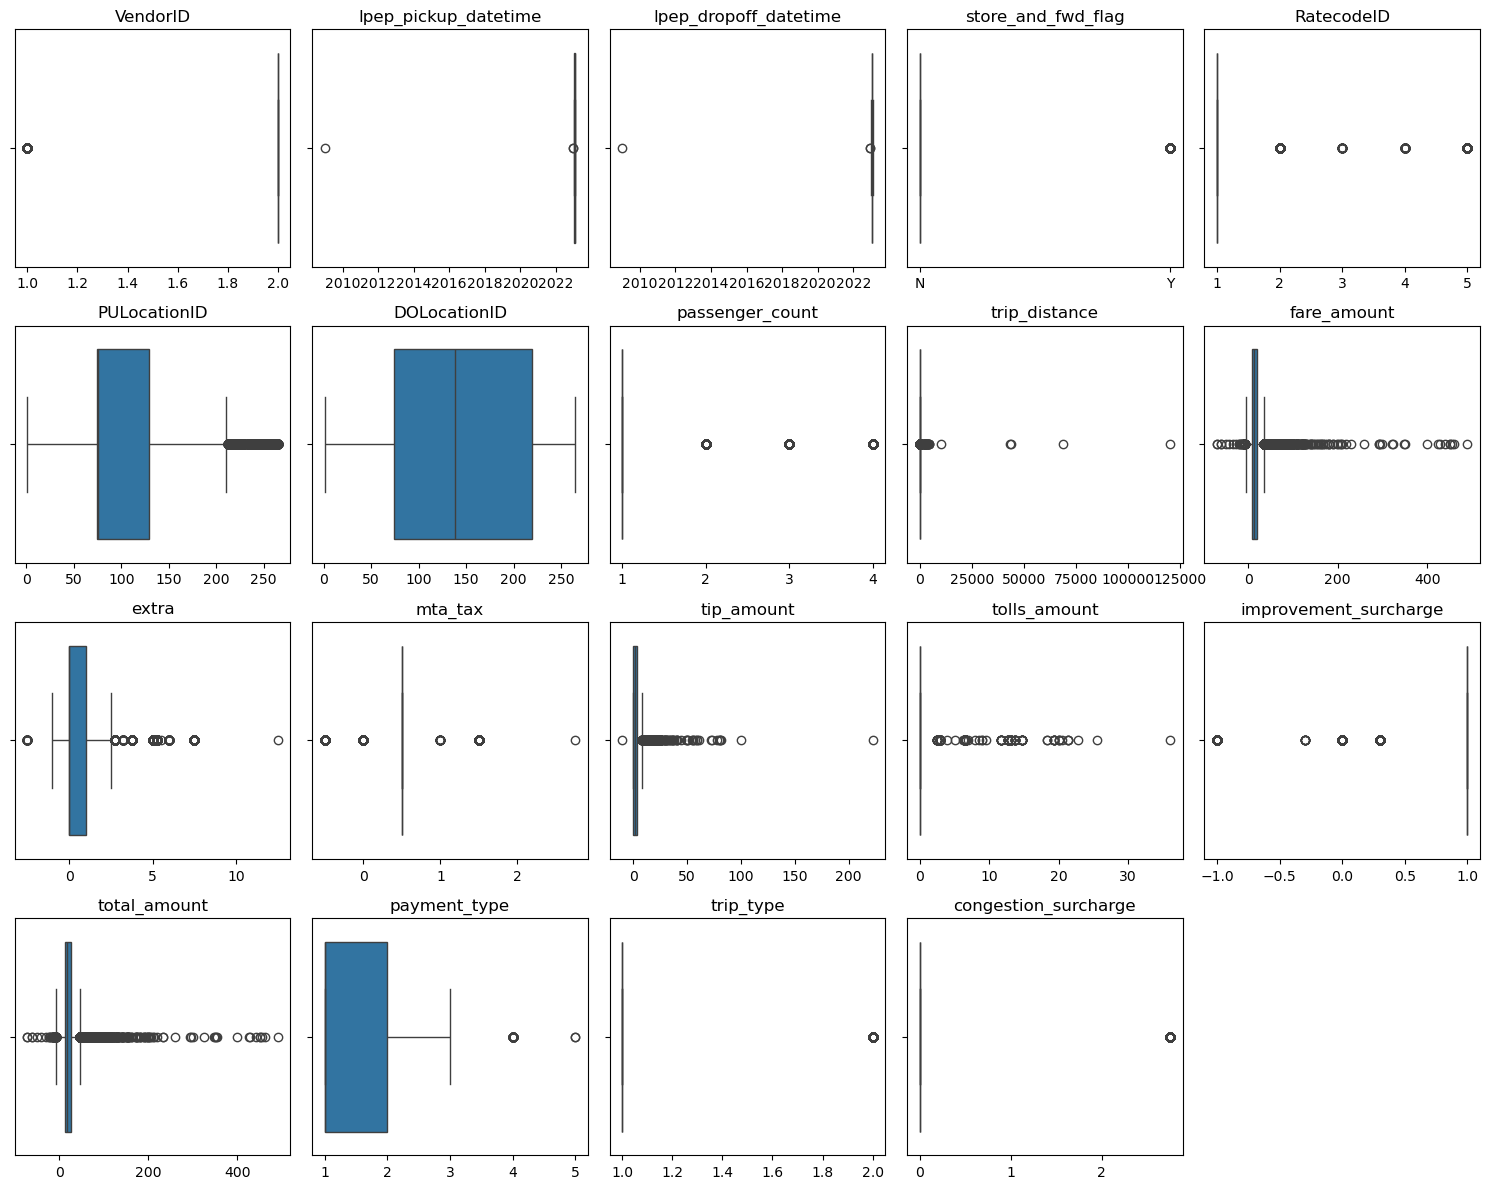

In [33]:
rows, cols = 4,5
fig, axes = plt.subplots(rows, cols, figsize=(15,12))
axes = axes.flatten()
for i, column in enumerate(data.columns):
    sns.boxplot(data=data, x=column, ax=axes[i])  # Use each subplot's axis
    axes[i].set_title(column)
    axes[i].set_xlabel('')  # Optional: Hide x-axis labels for a cleaner look

# Remove any empty subplots (if columns < grid slots)
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68211 non-null  int64         
 1   lpep_pickup_datetime   68211 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68211 non-null  datetime64[ns]
 3   store_and_fwd_flag     68211 non-null  object        
 4   RatecodeID             68211 non-null  float64       
 5   PULocationID           68211 non-null  int64         
 6   DOLocationID           68211 non-null  int64         
 7   passenger_count        68211 non-null  float64       
 8   trip_distance          68211 non-null  float64       
 9   fare_amount            68211 non-null  float64       
 10  extra                  68211 non-null  float64       
 11  mta_tax                68211 non-null  float64       
 12  tip_amount             68211 non-null  float64       
 13  t

From this Boxplot we found several anomali:
- `lpep_pickup_datetime` and ` lpep_dropoff_datetime` have data since 2009 (action : Drop)
- `trip distance` > 1000 where doesnt makesense (action : manipulate)
- `mta_tax` have -0.50 (action : replace based on normaltest)
- `improvement_surcharge` have -1.0 and -3.0 (action: normal test and then replace)
- `extra` have negative value (action: normal test and then replace)
- `fare_amount` have negative value (action: normal test and then replace)
- `tip_amount` drop outlier > 100
- `tollS_amount` drop outlier > 30


In [35]:
data['lpep_dropoff_datetime'].dt.year.value_counts()

lpep_dropoff_datetime
2023    68208
2022        2
2009        1
Name: count, dtype: int64

In [36]:
data = data[data['lpep_pickup_datetime'].dt.year==2023]

data not at 2023 are dropped (didnt selected)

In [37]:
len(data)

68208

In [38]:
data['trip_distance']=pd.to_numeric(data['trip_distance'], errors='coerce')
data.loc[data['trip_distance'] >= 200, 'trip_distance'] = data['trip_distance'].apply(
    lambda x: f"{x / 100:.2f}" if x >= 200 else x
)

/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_25560/3169798954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['trip_distance']=pd.to_numeric(data['trip_distance'], errors='coerce')
/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_25560/3169798954.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['15.72' '5.80' '25.55' '30.78' '26.07' '433.92' '24.47' '20.27' '10.82'
 '1200.99' '26.46' '39.66' '15.93' '23.78' '35.16' '104.80' '18.03'
 '26.35' '43.89' '23.67' '2.55' '440.03' '45.03' '35.09' '20.11' '39.41'
 '39.82' '36.14' '15.43' '24.64' '33.21' '47.07' '687.97' '23.89' '30.09'
 '40.71']' has dtype incompatible with float64, pleas

In [39]:
data.trip_distance.value_counts()

trip_distance
0.0      3350
1.4       639
1.3       575
1.2       531
1.5       491
         ... 
18.0        1
35.36       1
15.54       1
16.77       1
40.71       1
Name: count, Length: 1870, dtype: int64

`trip_distance` didnt should be 0 so i want to drop it

`trip_distance` == 0 is doesnt make sense

In [40]:
data['trip_distance']=pd.to_numeric(data['trip_distance'], errors='coerce')
data = data[data['trip_distance']>0.5]

/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_25560/1938698987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['trip_distance']=pd.to_numeric(data['trip_distance'], errors='coerce')


In [41]:
data.trip_distance.describe()

count    62513.000000
mean         2.962280
std          6.724331
min          0.510000
25%          1.300000
50%          2.000000
75%          3.410000
max       1200.990000
Name: trip_distance, dtype: float64

- `mta_tax` have -0.50 (action : replace based on normaltest)
- `improvement_surcharge` have -1.0 and -3.0 (action: normal test and then replace)
- `extra` have negative value (action: normal test and then replace)

In [42]:
statistic_tax, p_value_tax = normaltest(data['mta_tax'])
print(f"statistic_tax - Statistic: {statistic_tax}, p-value: {p_value_tax}")

statistic_imp, p_value_imp = normaltest(data['improvement_surcharge'])
print(f"statistic_imp - Statistic: {statistic_imp}, p-value: {p_value_imp}")

statistic_ext, p_value_ext = normaltest(data['extra'])
print(f"statistic_ext - Statistic: {statistic_ext}, p-value: {p_value_ext}")

statistic_tax - Statistic: 17880.110988522094, p-value: 0.0
statistic_imp - Statistic: 51956.67162804128, p-value: 0.0
statistic_ext - Statistic: 21410.368279258124, p-value: 0.0


this 3 data are not normal distribution so we input the replace with median

In [43]:
data.mta_tax.value_counts()

mta_tax
 0.5    50392
 1.5     7324
 0.0     4753
-0.5       32
 1.0       12
Name: count, dtype: int64

In [44]:
median_tax = data['mta_tax'].median()
data['mta_tax'].replace(-0.50, median_tax,inplace=True)
data.mta_tax.value_counts()

/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_25560/2107378724.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['mta_tax'].replace(-0.50, median_tax,inplace=True)


mta_tax
0.5    50424
1.5     7324
0.0     4753
1.0       12
Name: count, dtype: int64

2.75 is only one, this thing should be better if we deleted

In [45]:
data.improvement_surcharge.value_counts()

improvement_surcharge
 1.0    58772
 0.3     3638
 0.0       71
-1.0       30
-0.3        2
Name: count, dtype: int64

In [46]:
median_imp = data['improvement_surcharge'].median()
data['improvement_surcharge'].replace(-0.3, median_imp,inplace=True)
data['improvement_surcharge'].replace(-1.0, median_imp,inplace=True)
data.improvement_surcharge.value_counts()

/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_25560/462021207.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['improvement_surcharge'].replace(-0.3, median_imp,inplace=True)
/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_25560/462021207.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

improvement_surcharge
1.0    58804
0.3     3638
0.0       71
Name: count, dtype: int64

In [47]:
data.extra.value_counts()

extra
 0.00     36478
 2.50     11487
 1.00     10473
 2.75      1561
 5.00       805
 0.50       564
 5.25       492
 7.50       283
 3.75       219
 6.00        79
 3.25        52
-2.50        12
-1.00         6
 5.50         1
 12.50        1
Name: count, dtype: int64

In [48]:
median_ext = data['extra'].median()
data['extra'].replace(-0.50, median_ext,inplace=True)
data['extra'].replace(-1.00, median_imp,inplace=True)
data['extra'].replace(-2.50, median_imp,inplace=True)
data.extra.value_counts()

/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_25560/2284955229.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['extra'].replace(-0.50, median_ext,inplace=True)
/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_25560/2284955229.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

extra
0.00     36478
2.50     11487
1.00     10491
2.75      1561
5.00       805
0.50       564
5.25       492
7.50       283
3.75       219
6.00        79
3.25        52
5.50         1
12.50        1
Name: count, dtype: int64

Data extra have a lot outlier, so we should remove the data who have outlier, so we should declare the treshold, where i want to declare the treshold is 7.50

In [49]:
# Define a maximum threshold based on analysis
max_threshold = 7.50  # Adjust as needed based on domain knowledge

# Filter to keep only rows with 0 <= extra <= max_threshold
data = data[(data['extra'] >= 0) & (data['extra'] <= max_threshold)]

# Display the resulting DataFrame
print(data['extra'].value_counts())

extra
0.00    36478
2.50    11487
1.00    10491
2.75     1561
5.00      805
0.50      564
5.25      492
7.50      283
3.75      219
6.00       79
3.25       52
5.50        1
Name: count, dtype: int64


cause we see again if in fare amount there any negative value we should drop the negative fare amount

In [50]:
print("how many fare amount below zero is:",len(data[data['fare_amount']<0]))

how many fare amount below zero is: 33


In [51]:
data = data[data['fare_amount']>0]

In [52]:
data['extra'].describe()

count    62465.000000
mean         0.863932
std          1.288458
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          7.500000
Name: extra, dtype: float64

In [53]:
data.isnull().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

Data cleaned and not null there

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62465 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               62465 non-null  int64         
 1   lpep_pickup_datetime   62465 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  62465 non-null  datetime64[ns]
 3   store_and_fwd_flag     62465 non-null  object        
 4   RatecodeID             62465 non-null  float64       
 5   PULocationID           62465 non-null  int64         
 6   DOLocationID           62465 non-null  int64         
 7   passenger_count        62465 non-null  float64       
 8   trip_distance          62465 non-null  float64       
 9   fare_amount            62465 non-null  float64       
 10  extra                  62465 non-null  float64       
 11  mta_tax                62465 non-null  float64       
 12  tip_amount             62465 non-null  float64       
 13  tolls_

In [55]:
data.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,62465.000000,62465,62465,62465.000000,62465.000000,62465.000000,62465.000000,62465.000000,62465.000000,62465.000000,62465.000000,62465.000000,62465.000000,62465.000000,62465.000000,62465.000000,62465.000000,62465.000000
mean,1.880317,2023-01-16 22:28:46.721027584,2023-01-16 22:47:12.278540288,1.049772,97.392044,139.412311,1.119683,2.961222,16.756812,0.863932,0.579404,2.248400,0.161699,0.958255,22.142453,1.337069,1.009781,0.732570
min,1.000000,2023-01-01 00:01:31,2023-01-01 00:13:26,1.000000,3.000000,1.000000,1.000000,0.510000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,1.010000,1.000000,1.000000,0.000000
25%,2.000000,2023-01-09 12:15:10,2023-01-09 12:34:13,1.000000,74.000000,74.000000,1.000000,1.300000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,13.350000,1.000000,1.000000,0.000000
50%,2.000000,2023-01-17 09:16:45,2023-01-17 09:33:36,1.000000,75.000000,140.000000,1.000000,2.000000,13.500000,0.000000,0.500000,1.940000,0.000000,1.000000,18.200000,1.000000,1.000000,0.000000
75%,2.000000,2023-01-24 16:01:07,2023-01-24 16:17:45,1.000000,116.000000,223.000000,1.000000,3.410000,19.800000,1.000000,0.500000,3.480000,0.000000,1.000000,26.350000,2.000000,1.000000,2.750000
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,5.000000,265.000000,265.000000,4.000000,1200.990000,425.000000,7.500000,1.500000,222.220000,36.050000,1.000000,426.000000,4.000000,2.000000,2.750000
std,0.324593,NaN,NaN,0.433202,59.856811,76.428650,0.408926,6.723287,12.037338,1.288458,0.360507,3.008772,1.067327,0.166650,14.225256,0.480139,0.098417,1.215703


Before Move to Data Transformation dont forget to reset `total_amount` cause we manipulate several data, where have impact to `total_amount`

In [56]:
data['total_amount'] = data[['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'improvement_surcharge']].sum(axis=1)
data

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,21.43,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,11.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,9.00,1.0,1.0,0.00
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.70,1.0,0.5,0.00,0.0,1.0,20.20,2.0,1.0,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,1.0,49,62,1.0,40.71,15.70,0.0,0.0,0.00,0.0,1.0,16.70,1.0,1.0,0.00
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1.0,10,205,1.0,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,1.0,1.0,0.00
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1.0,66,37,1.0,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,1.0,1.0,0.00
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1.0,225,189,1.0,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,1.0,1.0,0.00


DROP OUTLIER

In [57]:
data = data[data['tip_amount']< 100]
data.tip_amount.describe()

count    62464.000000
mean         2.244879
std          2.877183
min          0.000000
25%          0.000000
50%          1.940000
75%          3.480000
max         80.880000
Name: tip_amount, dtype: float64

In [58]:
data = data[data['tolls_amount']< 30]
data.tolls_amount.describe()

count    62463.000000
mean         0.161127
std          1.057640
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         22.750000
Name: tolls_amount, dtype: float64

In [59]:
# Apply transformation to `trip_distance` and convert result to float
data['trip_distance'] = data['trip_distance'].astype(float)
data.loc[data['trip_distance'] >= 200.0, 'trip_distance'] = data['trip_distance'].apply(
    lambda x: round(x / 100, 2) if x >= 200.0 else x
)

# Now filter `trip_distance` with the updated float values
data = data[data['trip_distance'] > 0.5]

# Display summary statistics
print(data['trip_distance'].describe())

count    62463.000000
mean         2.917079
std          2.944789
min          0.510000
25%          1.300000
50%          2.000000
75%          3.410000
max        137.950000
Name: trip_distance, dtype: float64


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62463 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               62463 non-null  int64         
 1   lpep_pickup_datetime   62463 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  62463 non-null  datetime64[ns]
 3   store_and_fwd_flag     62463 non-null  object        
 4   RatecodeID             62463 non-null  float64       
 5   PULocationID           62463 non-null  int64         
 6   DOLocationID           62463 non-null  int64         
 7   passenger_count        62463 non-null  float64       
 8   trip_distance          62463 non-null  float64       
 9   fare_amount            62463 non-null  float64       
 10  extra                  62463 non-null  float64       
 11  mta_tax                62463 non-null  float64       
 12  tip_amount             62463 non-null  float64       
 13  tolls_

## Data Transformation

Cause my  purpose is try to make business analytic of NYC taxi, so i want separate data to be day, month, year and hour of each data

In [61]:

data['month_pickup'] = data['lpep_pickup_datetime'].dt.month
data['day_pickup'] = data['lpep_pickup_datetime'].dt.day
data['hour_pickup'] = data['lpep_pickup_datetime'].dt.hour
data['pickup_day'] = data['lpep_pickup_datetime'].dt.dayofweek
data['pickup_day_name'] = data['lpep_pickup_datetime'].dt.day_name()

In [62]:
data

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,month_pickup,day_pickup,hour_pickup,pickup_day,pickup_day_name
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,1.0,21.43,1.0,1.0,2.75,1,1,0,6,Sunday
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,1.0,15.84,1.0,1.0,0.00,1,1,0,6,Sunday
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,1.0,11.20,1.0,1.0,0.00,1,1,0,6,Sunday
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,1.0,9.00,1.0,1.0,0.00,1,1,0,6,Sunday
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.70,...,1.0,20.20,2.0,1.0,2.75,1,1,0,6,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,1.0,49,62,1.0,40.71,15.70,...,1.0,16.70,1.0,1.0,0.00,1,31,22,1,Tuesday
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1.0,10,205,1.0,2.14,4.41,...,1.0,5.41,1.0,1.0,0.00,1,31,22,1,Tuesday
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1.0,66,37,1.0,3.44,16.53,...,1.0,21.04,1.0,1.0,0.00,1,31,23,1,Tuesday
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1.0,225,189,1.0,3.03,14.98,...,1.0,19.18,1.0,1.0,0.00,1,31,23,1,Tuesday


In [63]:

data['month_dropoff'] = data['lpep_dropoff_datetime'].dt.month
data['day_dropoff'] = data['lpep_dropoff_datetime'].dt.day
data['hour_dropoff'] = data['lpep_dropoff_datetime'].dt.hour
data['dropoff_day'] = data['lpep_dropoff_datetime'].dt.dayofweek

In [64]:
data

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,congestion_surcharge,month_pickup,day_pickup,hour_pickup,pickup_day,pickup_day_name,month_dropoff,day_dropoff,hour_dropoff,dropoff_day
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,2.75,1,1,0,6,Sunday,1,1,0,6
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,0.00,1,1,0,6,Sunday,1,1,0,6
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,0.00,1,1,0,6,Sunday,1,1,0,6
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,0.00,1,1,0,6,Sunday,1,1,0,6
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.70,...,2.75,1,1,0,6,Sunday,1,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,1.0,49,62,1.0,40.71,15.70,...,0.00,1,31,22,1,Tuesday,1,31,22,1
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1.0,10,205,1.0,2.14,4.41,...,0.00,1,31,22,1,Tuesday,1,31,22,1
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1.0,66,37,1.0,3.44,16.53,...,0.00,1,31,23,1,Tuesday,2,1,0,2
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1.0,225,189,1.0,3.03,14.98,...,0.00,1,31,23,1,Tuesday,1,31,23,1


In [65]:
data.month_dropoff.value_counts()

month_dropoff
1    62448
2       15
Name: count, dtype: int64

drop value 2 in `month_dropoff`

In [66]:
data = data[data['month_dropoff']<2]
data.month_dropoff.value_counts()

month_dropoff
1    62448
Name: count, dtype: int64

In [67]:
# data['trip_duration_hours'] = (data['lpep_dropoff_datetime'] - data['lpep_pickup_datetime']).dt.total_seconds() / 3600

In [68]:
data['trip_duration_minutes'] = (data['lpep_dropoff_datetime'] - data['lpep_pickup_datetime']).dt.total_seconds() / 60

/var/folders/3v/hv5ldk793vl31x7tgfq73tmr0000gn/T/ipykernel_25560/21176370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['trip_duration_minutes'] = (data['lpep_dropoff_datetime'] - data['lpep_pickup_datetime']).dt.total_seconds() / 60


`trip_duration_minutes` have a purpose to know duration betwwen the trip

In [69]:
data.trip_duration_minutes.describe()

count    62448.000000
mean        18.286640
std         73.876923
min          0.000000
25%          7.783333
50%         11.750000
75%         17.600000
max       1438.933333
Name: trip_duration_minutes, dtype: float64

we found trip minute min is 0 that doesnt make sense cause the trip didnt start so we choose trip minute > 1

In [70]:
data = data[data['trip_duration_minutes']>1]

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62362 entries, 0 to 68209
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               62362 non-null  int64         
 1   lpep_pickup_datetime   62362 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  62362 non-null  datetime64[ns]
 3   store_and_fwd_flag     62362 non-null  object        
 4   RatecodeID             62362 non-null  float64       
 5   PULocationID           62362 non-null  int64         
 6   DOLocationID           62362 non-null  int64         
 7   passenger_count        62362 non-null  float64       
 8   trip_distance          62362 non-null  float64       
 9   fare_amount            62362 non-null  float64       
 10  extra                  62362 non-null  float64       
 11  mta_tax                62362 non-null  float64       
 12  tip_amount             62362 non-null  float64       
 13  tolls_

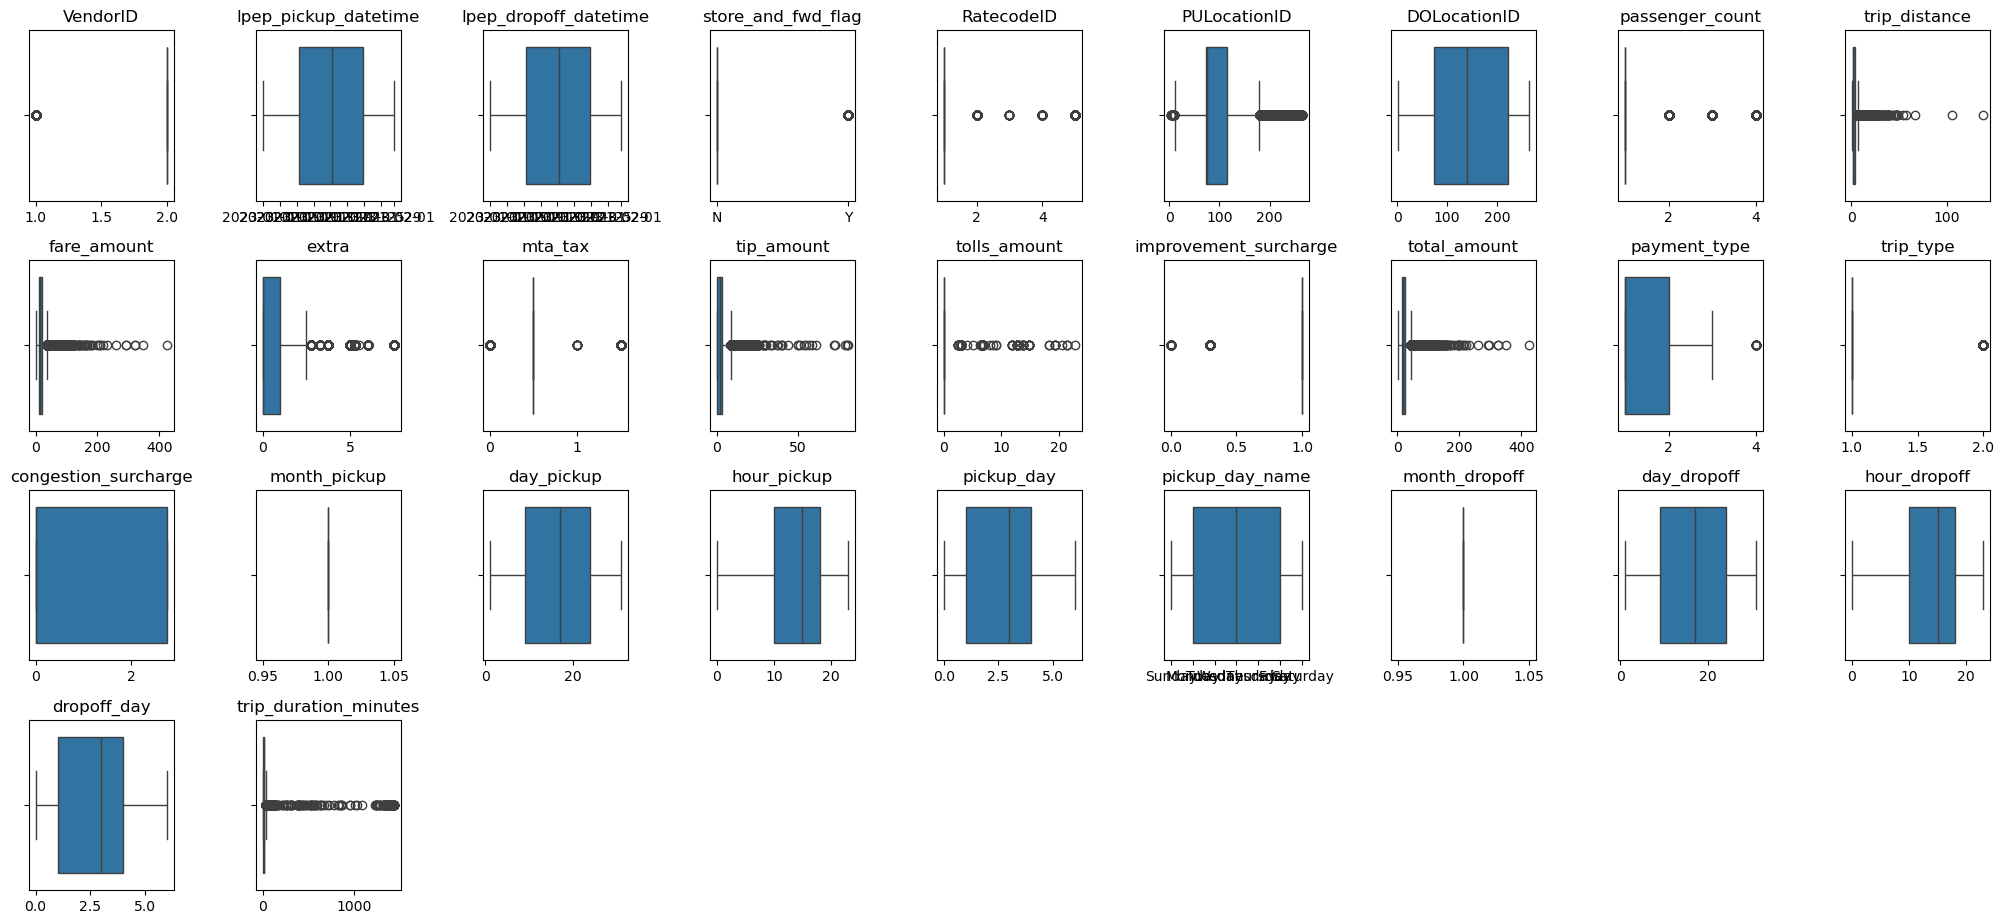

In [72]:
rows, cols = 7, 9
fig, axes = plt.subplots(rows, cols, figsize=(20, 16))
axes = axes.flatten()
for i, column in enumerate(data.columns):
    sns.boxplot(data=data, x=column, ax=axes[i])  # Use each subplot's axis
    axes[i].set_title(column)
    axes[i].set_xlabel('')  # Optional: Hide x-axis labels for a cleaner look

# Remove any empty subplots (if columns < grid slots)
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

After seen this Boxplot column `trip_duration_minutes`, `trip_distance` and `total_amount` still have outlier, so we drop the data above treshold, where at `trip_duration_minutes` setting `<` 120, at `trip_distances` we set `<` 70 and at `total_amount` we set `<` 400

In [73]:
data=data[data['trip_duration_minutes']<120]

In [74]:
data = data[data['trip_distance']<70]

In [75]:
data = data[data['total_amount']<400]

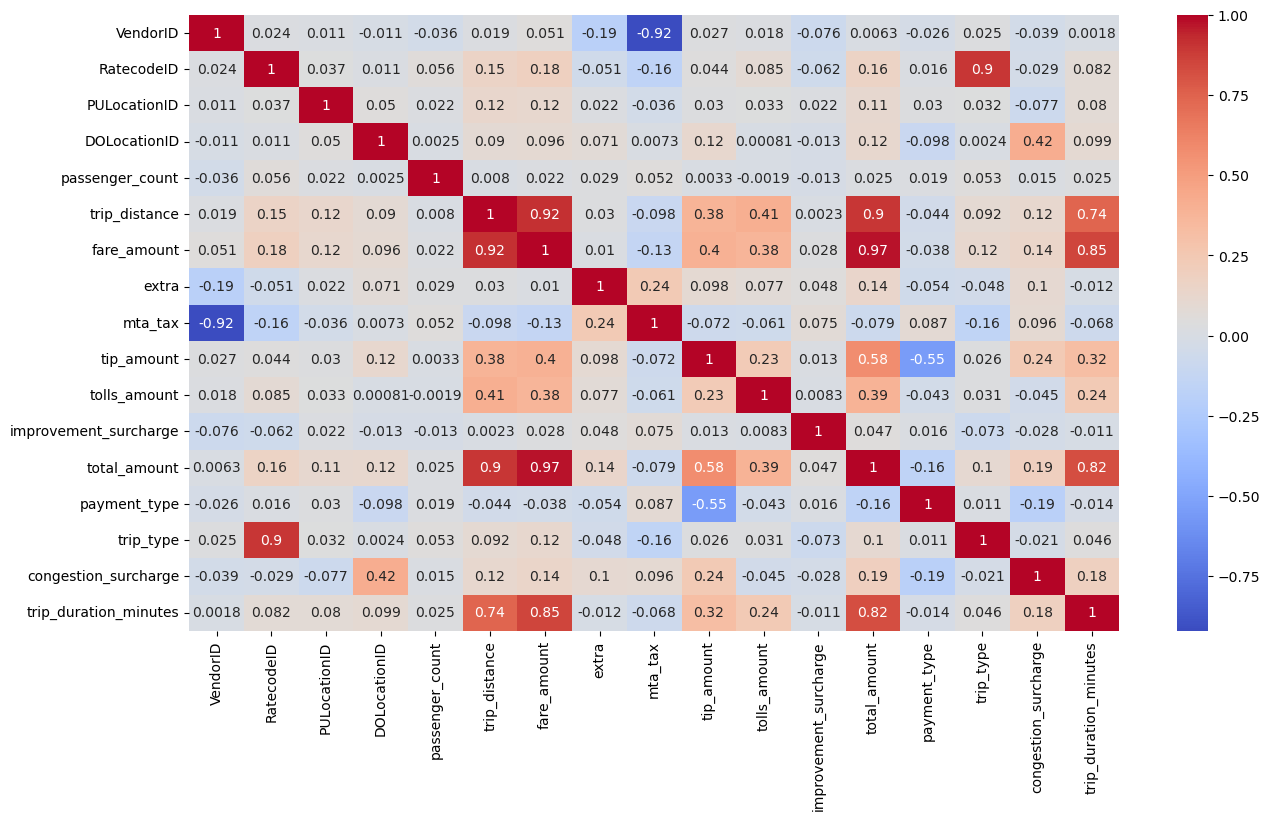

In [76]:
numeric_df = data.select_dtypes(include=['float64', 'int64'])

# Create correlation heatmap
plt.figure(figsize=(15,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

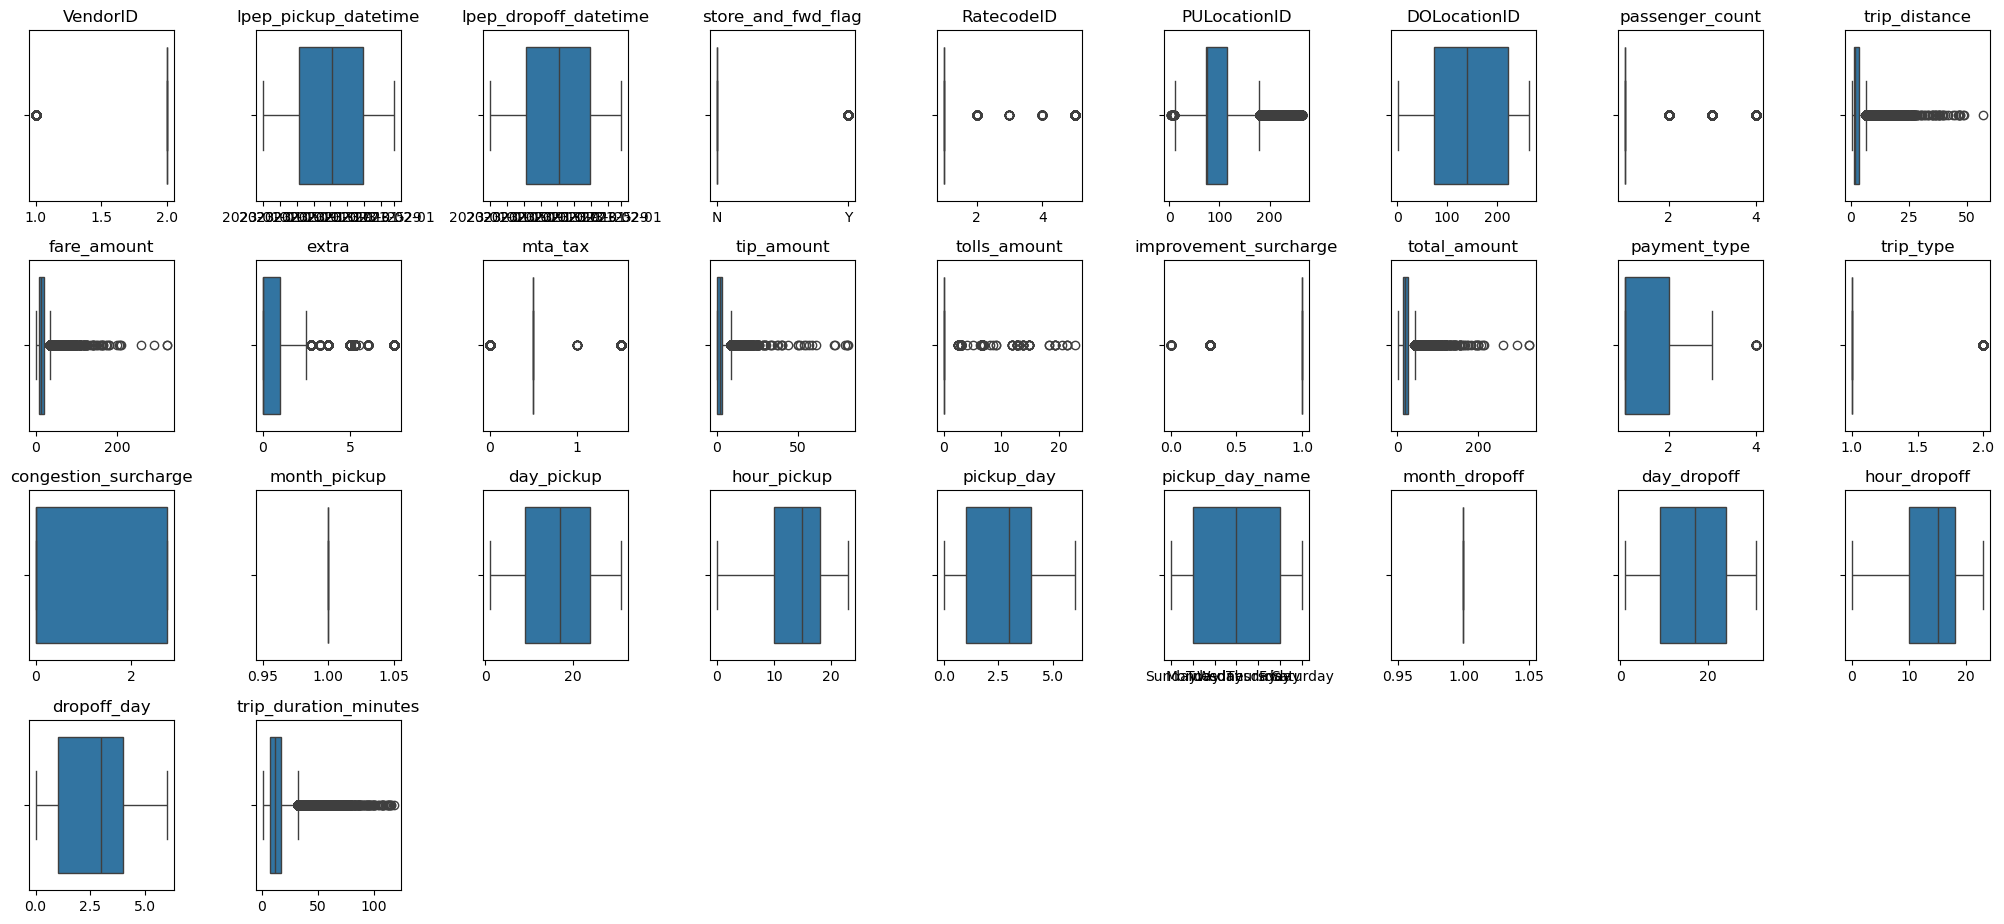

In [77]:
rows, cols = 7, 9
fig, axes = plt.subplots(rows, cols, figsize=(20, 16))
axes = axes.flatten()
for i, column in enumerate(data.columns):
    sns.boxplot(data=data, x=column, ax=axes[i])  # Use each subplot's axis
    axes[i].set_title(column)
    axes[i].set_xlabel('')  # Optional: Hide x-axis labels for a cleaner look

# Remove any empty subplots (if columns < grid slots)
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [78]:
data.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'month_pickup',
       'day_pickup', 'hour_pickup', 'pickup_day', 'pickup_day_name',
       'month_dropoff', 'day_dropoff', 'hour_dropoff', 'dropoff_day',
       'trip_duration_minutes'],
      dtype='object')

In [92]:
data.pickup_day_name.value_counts()

pickup_day_name
Tuesday      10243
Thursday      9314
Friday        9126
Monday        9098
Wednesday     8962
Saturday      7774
Sunday        7599
Name: count, dtype: int64

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62116 entries, 0 to 68209
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               62116 non-null  int64         
 1   lpep_pickup_datetime   62116 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  62116 non-null  datetime64[ns]
 3   store_and_fwd_flag     62116 non-null  object        
 4   RatecodeID             62116 non-null  float64       
 5   PULocationID           62116 non-null  int64         
 6   DOLocationID           62116 non-null  int64         
 7   passenger_count        62116 non-null  float64       
 8   trip_distance          62116 non-null  float64       
 9   fare_amount            62116 non-null  float64       
 10  extra                  62116 non-null  float64       
 11  mta_tax                62116 non-null  float64       
 12  tip_amount             62116 non-null  float64       
 13  tolls_

In [80]:
len(data)

62116

In [81]:
data.trip_distance.value_counts(sort=False)

trip_distance
2.58     107
1.81     170
1.30     569
1.10     467
2.78      91
        ... 
18.22      1
13.17      1
18.62      1
30.09      1
40.71      1
Name: count, Length: 1792, dtype: int64

AFTER WE MANIPULATE COLUMN AND DATA NOW TIME TO EDA

In [82]:
# Q1 = data['trip_distance'].quantile(0.25)
# Q3 = data['trip_distance'].quantile(0.75)
# IQR = Q3 - Q1
# # Define outliers as values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
# outliers = data[(data['trip_distance'] < (Q1 - 1.5 * IQR)) | (data['trip_distance'] > (Q3 + 1.5 * IQR))]

# # Print outliers
# print("Outliers:\n", outliers)
# len(outliers)

## Exploratory Data Analysis

### Question 1: at which Month have high traffic pickup and dropoff


Daily Business Summary:
            total_amount  VendorID
pickup_day                        
0              192278.23      9098
1              219826.94     10243
2              190218.49      8962
3              203039.09      9314
4              196768.74      9126
5              164682.17      7774
6              160004.64      7599


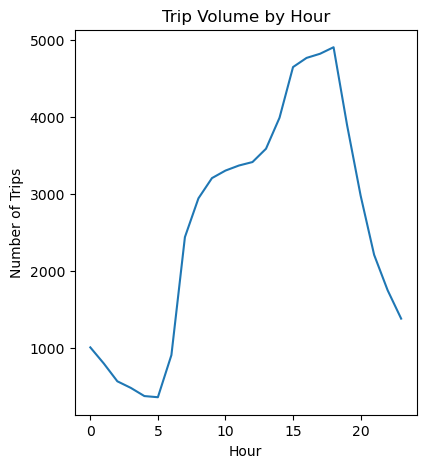

In [83]:
# 1. Hourly Analysis
plt.figure(figsize=(15, 5))
hourly_trips = data.groupby('hour_pickup').agg({
    'VendorID': 'count',
    'total_amount': 'mean',
    'trip_distance': 'mean'
}).round(2)

plt.subplot(131)
sns.lineplot(data=hourly_trips['VendorID'])
plt.title('Trip Volume by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')

# 2. Daily Analysis
daily_revenue = data.groupby('pickup_day').agg({
    'total_amount': 'sum',
    'VendorID': 'count'
}).round(2)

print("\nDaily Business Summary:")
print(daily_revenue)


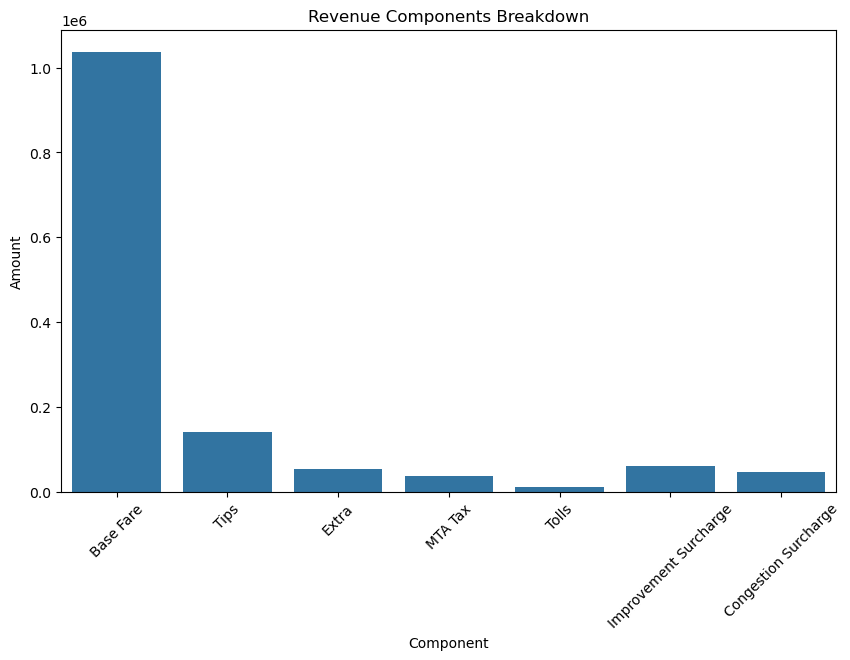


Payment Type Analysis:
             total_amount                   tip_amount
                    count   mean        sum       mean
payment_type                                          
1.0                 41420  22.81  944677.23       3.37
2.0                 20557  18.49  380076.57       0.00
3.0                   115  14.60    1678.50       0.00
4.0                    24  16.08     386.00       0.00


In [84]:
# 1. Revenue Components
revenue_components = pd.DataFrame({
    'Component': ['Base Fare', 'Tips', 'Extra', 'MTA Tax', 'Tolls', 
                 'Improvement Surcharge', 'Congestion Surcharge'],
    'Amount': [data['fare_amount'].sum(),
              data['tip_amount'].sum(),
              data['extra'].sum(),
              data['mta_tax'].sum(),
              data['tolls_amount'].sum(),
              data['improvement_surcharge'].sum(),
              data['congestion_surcharge'].sum()]
})

plt.figure(figsize=(10, 6))
sns.barplot(data=revenue_components, x='Component', y='Amount')
plt.xticks(rotation=45)
plt.title('Revenue Components Breakdown')
plt.show()

# 2. Payment Analysis
payment_analysis = data.groupby('payment_type').agg({
    'total_amount': ['count', 'mean', 'sum'],
    'tip_amount': 'mean'
}).round(2)

print("\nPayment Type Analysis:")
print(payment_analysis)


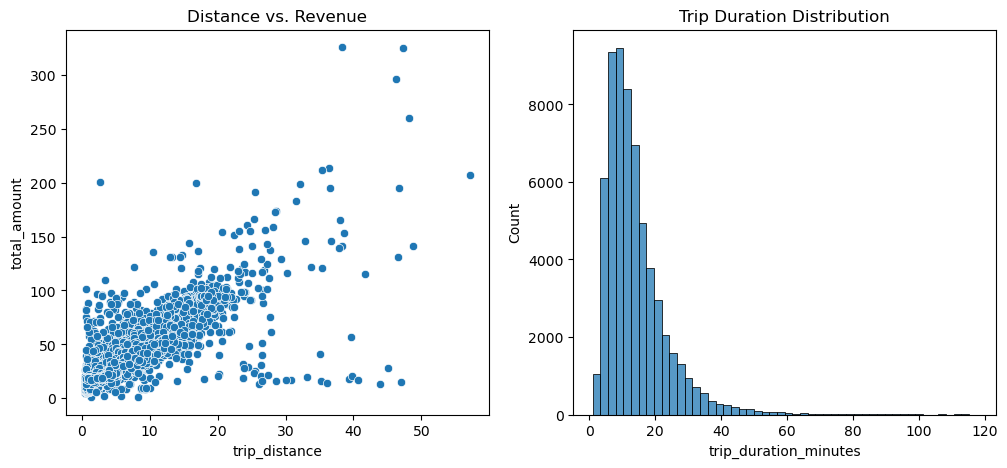


Passenger Count Metrics:
                 total_amount  trip_distance  trip_duration_minutes  VendorID
passenger_count                                                              
1.0                     21.23           2.90                  13.98     56259
2.0                     22.71           2.99                  15.23      4639
3.0                     22.45           3.00                  14.85       869
4.0                     21.41           2.92                  13.52       349


In [85]:
# 1. Distance vs. Revenue Analysis
plt.figure(figsize=(12, 5))
plt.subplot(121)
sns.scatterplot(data=data, x='trip_distance', y='total_amount')
plt.title('Distance vs. Revenue')

# 2. Trip Duration Analysis
plt.subplot(122)
sns.histplot(data=data, x='trip_duration_minutes', bins=50)
plt.title('Trip Duration Distribution')
plt.show()

# 3. Average metrics by passenger count
passenger_metrics = data.groupby('passenger_count').agg({
    'total_amount': 'mean',
    'trip_distance': 'mean',
    'trip_duration_minutes': 'mean',
    'VendorID': 'count'
}).round(2)

print("\nPassenger Count Metrics:")
print(passenger_metrics)


In [86]:
# 1. Top Pickup Locations
top_pickup = data.groupby('PULocationID').agg({
    'VendorID': 'count',
    'total_amount': 'sum',
    'trip_distance': 'mean'
}).sort_values('VendorID', ascending=False).head(10)

print("\nTop 10 Pickup Locations:")
print(top_pickup)

# 2. Popular Routes
popular_routes = data.groupby(['PULocationID', 'DOLocationID']).size()\
    .sort_values(ascending=False).head(10)

print("\nMost Popular Routes:")
print(popular_routes)



Top 10 Pickup Locations:
              VendorID  total_amount  trip_distance
PULocationID                                       
74               12693     239189.21       2.323154
75                8639     166733.96       2.384643
41                3695      67263.94       2.384309
166               3670      76635.54       2.661428
95                3567      69099.11       2.592170
43                2772      56862.67       2.425354
82                2726      59171.42       2.910187
97                2084      45534.59       2.552519
244               1711      53146.80       5.241882
7                 1684      35528.45       2.938700

Most Popular Routes:
PULocationID  DOLocationID
74            75              1958
75            74              1429
74            236             1175
95            95              1047
74            166              928
              41               915
              42               706
              238              689
              263    

In [87]:
# 1. Revenue per minute
data['revenue_per_minute'] = data['total_amount'] / data['trip_duration_minutes']
data['revenue_per_mile'] = data['total_amount'] / data['trip_distance']

efficiency_metrics = pd.DataFrame({
    'Metric': ['Revenue per Minute', 'Revenue per Mile'],
    'Average': [data['revenue_per_minute'].mean(),
                data['revenue_per_mile'].mean()]
}).round(2)

print("\nEfficiency Metrics:")
print(efficiency_metrics)

# 2. Hourly Revenue Analysis
hourly_revenue = data.groupby('hour_pickup').agg({
    'total_amount': 'sum',
    'VendorID': 'count'
}).assign(
    avg_revenue_per_trip=lambda x: x['total_amount'] / x['VendorID']
).round(2)

print("\nHourly Revenue Analysis:")
print(hourly_revenue)



Efficiency Metrics:
               Metric  Average
0  Revenue per Minute     1.68
1    Revenue per Mile     9.17

Hourly Revenue Analysis:
             total_amount  VendorID  avg_revenue_per_trip
hour_pickup                                              
0                21442.26      1006                 21.31
1                17822.63       796                 22.39
2                13911.50       565                 24.62
3                12304.85       479                 25.69
4                 9808.64       373                 26.30
5                10000.86       358                 27.94
6                19142.20       906                 21.13
7                49853.94      2440                 20.43
8                63385.13      2944                 21.53
9                67818.71      3207                 21.15
10               70108.39      3305                 21.21
11               71688.72      3371                 21.27
12               71388.51      3416             

In [88]:
def generate_business_insights(df):
    print("BUSINESS INSIGHTS SUMMARY")
    print("========================")
    
    # 1. Peak Hours Revenue
    peak_hours = df.groupby('hour_pickup')['total_amount'].sum()\
        .sort_values(ascending=False).head(3)
    print("\nTop 3 Revenue Hours:")
    print(peak_hours)
    
    # 2. Most Profitable Routes
    profitable_routes = df.groupby(['PULocationID', 'DOLocationID'])['total_amount'].mean()\
        .sort_values(ascending=False).head(5)
    print("\nMost Profitable Routes:")
    print(profitable_routes)
    
    # 3. Payment Type Preferences
    payment_preference = df.groupby('payment_type').size()\
        .sort_values(ascending=False)
    print("\nPayment Type Distribution:")
    print(payment_preference)
    
    # 4. Average Trip Metrics
    print("\nAverage Trip Metrics:")
    print(f"Duration: {df['trip_duration_minutes'].mean():.2f} minutes")
    print(f"Distance: {df['trip_distance'].mean():.2f} miles")
    print(f"Revenue: ${df['total_amount'].mean():.2f}")
    
    # 5. Tip Analysis
    df['tip_percentage'] = (df['tip_amount'] / df['total_amount']) * 100
    print("\nTipping Behavior:")
    print(f"Average Tip Percentage: {df['tip_percentage'].mean():.2f}%")
    
    # 6. Business Growth Opportunities
    print("\nGrowth Opportunities:")
    low_demand_hours = df.groupby('hour_pickup')['VendorID'].count()\
        .sort_values().head(3)
    print("Hours with Lower Demand:")
    print(low_demand_hours)

# Generate insights
generate_business_insights(data)


BUSINESS INSIGHTS SUMMARY

Top 3 Revenue Hours:
hour_pickup
17    107269.26
16    106677.75
18    105916.41
Name: total_amount, dtype: float64

Most Profitable Routes:
PULocationID  DOLocationID
28            265             213.70
112           265             211.30
130           264             190.97
43            1               166.10
9             265             160.30
Name: total_amount, dtype: float64

Payment Type Distribution:
payment_type
1.0    41420
2.0    20557
3.0      115
4.0       24
dtype: int64

Average Trip Metrics:
Duration: 14.08 minutes
Distance: 2.91 miles
Revenue: $21.36

Tipping Behavior:
Average Tip Percentage: 9.68%

Growth Opportunities:
Hours with Lower Demand:
hour_pickup
5    358
4    373
3    479
Name: VendorID, dtype: int64


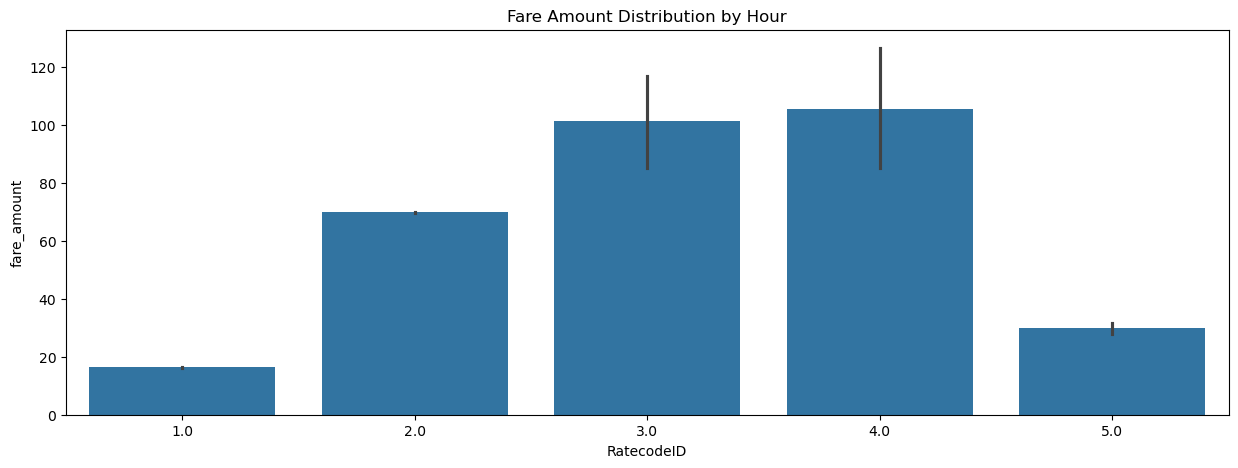

In [89]:
plt.figure(figsize=(15,5))
sns.barplot(x='RatecodeID', y='fare_amount', data=data)
plt.title('Fare Amount Distribution by Hour')
plt.show()

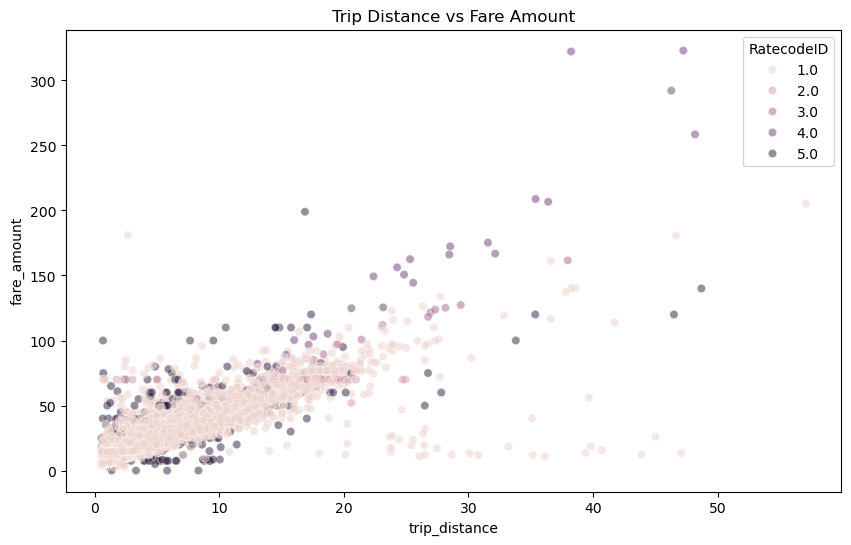

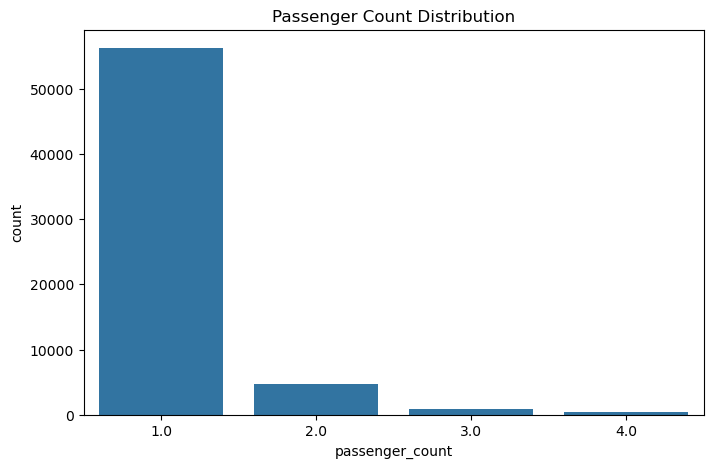

In [90]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='trip_distance', y='fare_amount', 
                hue='RatecodeID', alpha=0.5)
plt.title('Trip Distance vs Fare Amount')
plt.show()

# Passenger count distribution
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='passenger_count')
plt.title('Passenger Count Distribution')
plt.show()

### Question 2:

### Question 3:

### Question 4:

### Question 5:

## Statistical Analysis

In [91]:
from scipy import stats #for stats

## Export Result